<a href="https://colab.research.google.com/github/declan8010-git/DSBA/blob/main/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [ ]:
# write the code for reading the dataset abtest.csv
data = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#view a few rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Statistical summary of the dataset
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# Statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
#shape of the dataset
data.shape

(100, 6)

Observations:
- The dataset has 100 rows and 6 columns

In [ ]:
#data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
- All the columns have 100 observation, indicating there are no missning values in it.
- The dataset has 1 integer(user_id) and 1 float dtypes(time_spent_on_the_page)
- The dataset has 4 objects(group, landing_page, converted, and language_preferred
- Data Memory usage is 4.8+ KB

In [ ]:
#fix the data types
data['group'] = data.group.astype('category')
data['landing_page'] = data.landing_page.astype('category')
data['converted'] = data.converted.astype('category')
data['language_preferred'] = data.language_preferred.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [ ]:
#check for missing valve of the dataset
data.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


Observaions:
- Data set has no missing values
- Memory usage has changed from 4.8+ KB to 2.6 KB
- Datatypes has Category(40), Float(1), and Inte64(1)
- Object types in dataset is converted to category dtypes.


In [ ]:
pd.crosstab(data.time_spent_on_the_page,data.converted).sum()

,0
converted,
no,46
yes,54


In [ ]:
pd.crosstab(data.time_spent_on_the_page,data.group).sum()

,0
group,
control,50
treatment,50


In [ ]:
pd.crosstab(data.time_spent_on_the_page,data.landing_page).sum()

,0
landing_page,
new,50
old,50


In [ ]:
pd.crosstab(data.time_spent_on_the_page,data.language_preferred).sum()

,0
language_preferred,
English,32
French,34
Spanish,34


Observations:
- There are 2 landing_page of New(50) and Old(50)
- there are 100 users
- The Three language_prefered are (English, French, and Spanish)
- Two Group columns of 50 Control and 50 treatment.
- the are 46 No converted users and 50 converted users.

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,  # Adjust to your preference
    )  # Create the boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # Show the means in the boxplot
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # Create the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

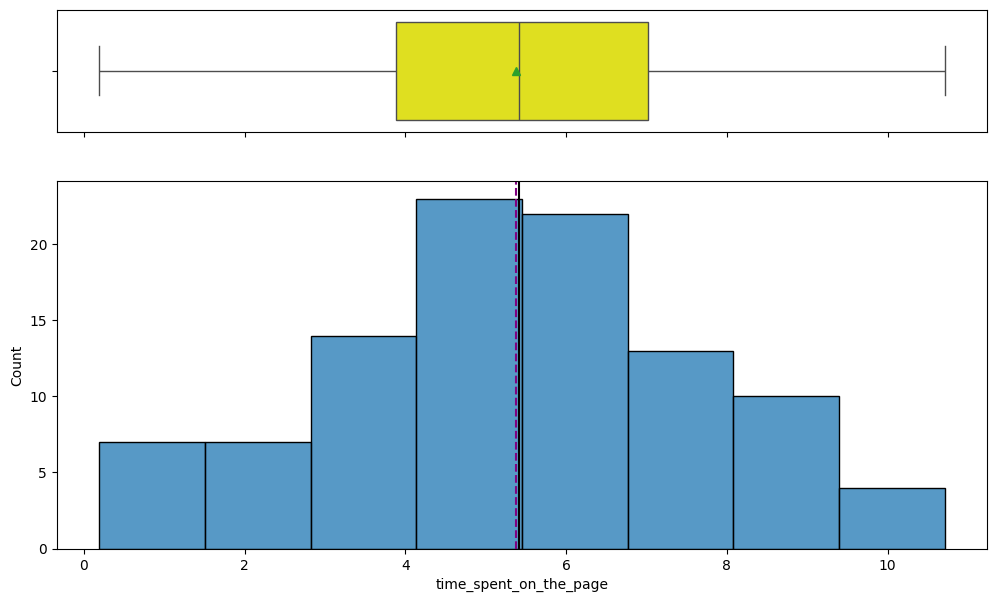

In [ ]:
histogram_boxplot(data,'time_spent_on_the_page')

Obervation:
- Normal distribution for time spent on the this page.
- this a symmetrical distribution

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()

    # show the plot

TypeError: <lambda>() takes from 4 to 5 positional arguments but 6 were given

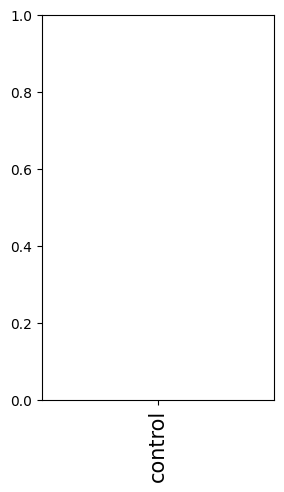

In [ ]:
labeled_barplot(data,'group', perc = True)

Obervation:
- The has 2 Columns (control and treatment)
- The total count of the group is 50  
- Control and treatment are both 50% in the group column.

TypeError: <lambda>() takes from 4 to 5 positional arguments but 6 were given

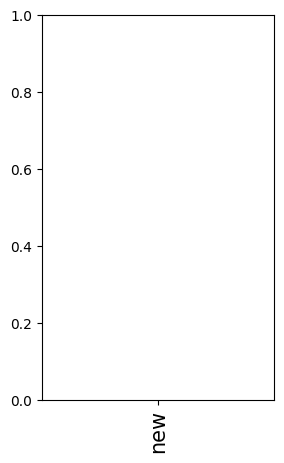

In [ ]:
labeled_barplot(data,'landing_page',perc = True)

Observations:
- The landing_page Y axis has 0 - 50 count and the X axis has 2 columns (new and old)
- landing columns page has 100 users.

TypeError: <lambda>() takes from 4 to 5 positional arguments but 6 were given

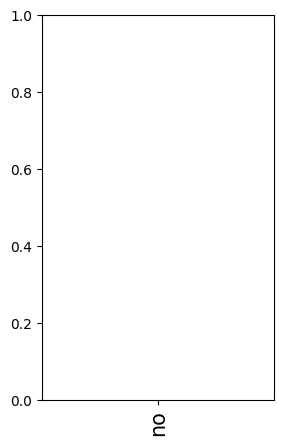

In [ ]:
labeled_barplot(data,'converted',perc=True)


Observations:
- A total of 100 converted users, with 46 No converted and 54 converted users

### Bivariate Analysis

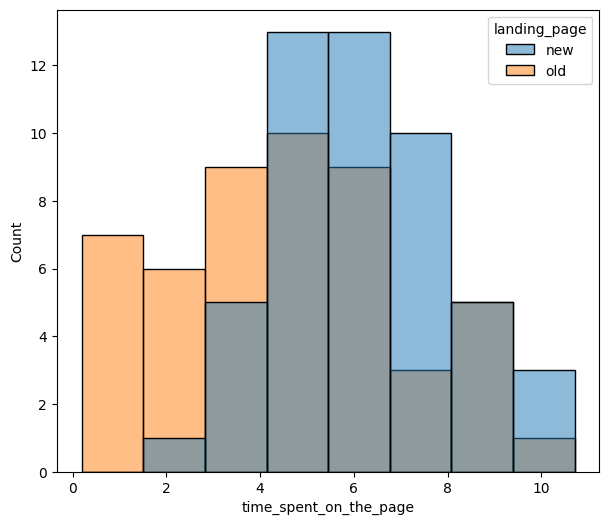

In [ ]:
 #visualizing relationship distrobution between time_spent_on_the_page and landing_page

plt.figure(figsize=(7,6))
sns.histplot(data,x = 'time_spent_on_the_page', hue='landing_page')
plt.show()

<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

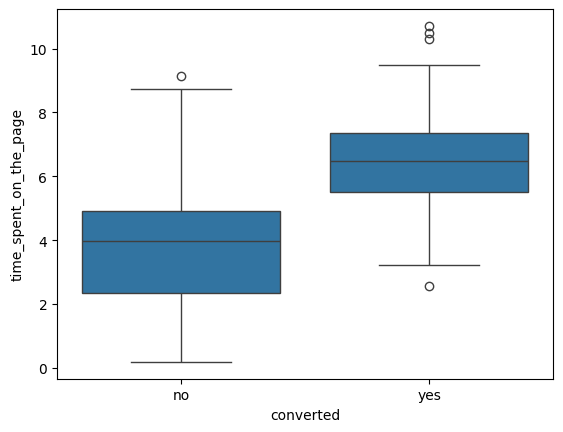

In [ ]:
# visualizing relationship distributions between time spent on the page and converted

sns.boxplot(data = data,y = 'time_spent_on_the_page', x ='converted')

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

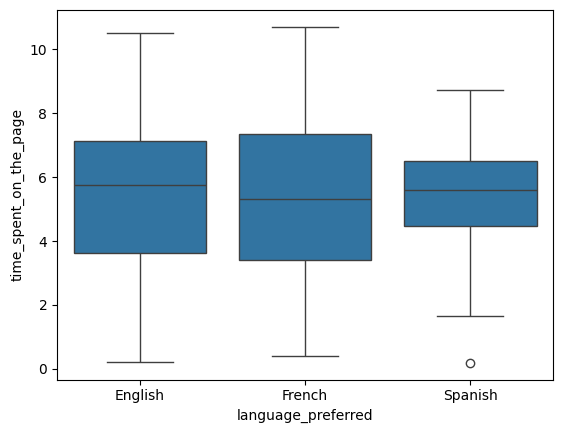

In [ ]:
#visualizing relationship distribution between time spent on the page and Languge Preferred

sns.boxplot( y = 'time_spent_on_the_page', x='language_preferred', data=data)

Observations:
- users of the new landing page spend more time on it compared to those on the old landing page.

- Converted users spend more time on the page than no converted users.

- More English-speaking users spend around 10 and above minutes on the page compared to French and Spanish-speaking users.

- More Spanish-speaking users spend around 8+ minutes on the page compared to French and English-speaking users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

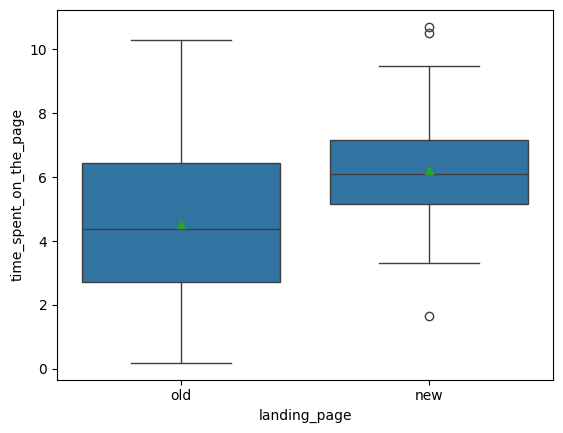

In [ ]:
#visual analysis of user time spent on the new and old landing pages

sns.boxplot(data = data, x = 'landing_page',y ='time_spent_on_the_page',showmeans=True)

Observations:
- landing_page have thesame mean and median
- The time spent distribution varies between the new and old landing pages.


### Step 1: Define the null and alternate hypotheses

Let
𝜇
1
μ
1
​
  and
𝜇
2
μ
2
​
  represent the mean time spent on the new and old landing pages, respectively.

We will test the null hypothesis:

𝐻
0
:
𝜇
1
=
𝜇
2
H
0
​
 :μ
1
​
 =μ
2
​

against the alternative hypothesis:

𝐻
𝑎
:
𝜇
1
>
𝜇
2
H
a
​
 :μ
1
​
 >μ
2
​


### Step 2: Select Appropriate test

Since the population standard deviation is unknown and we are comparing the sample means from two independent populations, we will use a two-sample independent t-test (ttest_ind)

### Step 3: Decide the significance level

Based on the problem statement, we set the significance level at:

𝛼 = 0.05

### Step 4: Collect and prepare data

In [ ]:
#Filtered data frames for users of the new and old landing pages

new_time_spent = data[data['landing_page'] == 'new']['time_spent_on_the_page']
old_time_spent = data[data['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is :',round(new_time_spent.std(),2))
print('The sample standard deviation of the time spent on the old page is :',round(old_time_spent.std(),2))

The sample standard deviation of the time spent on the new page is : 1.82
The sample standard deviation of the time spent on the old page is : 2.58


Observations:

- There is a difference in the sample standard deviations of the time spent on the page between the new and old landing pages.
- The population standard deviation is not equal

### Step 5: Calculate the p-value

In [ ]:
#find p-value using a ttest_ind

from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_time_spent,old_time_spent,equal_var=False,alternative='greater')
print('The p-value is :', p_value)

The p-value is : 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#print conclusion based on p-value

if p_value < 0.05:
    print(f'As p-value {p_value} is less than the level of significance, reject the null hypothesis.')
else:
    print(f'As p-value {p_value} is greater than the level of significance, fail to reject the null hypothesis.')

As p-value 0.0001392381225166549 is less than the level of significance, reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (~0.00014) is lower than the significance level (
α=0.05), we reject the null hypothesis. This provides sufficient evidence to conclude that users spend more time on the new landing page compared to the old one.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

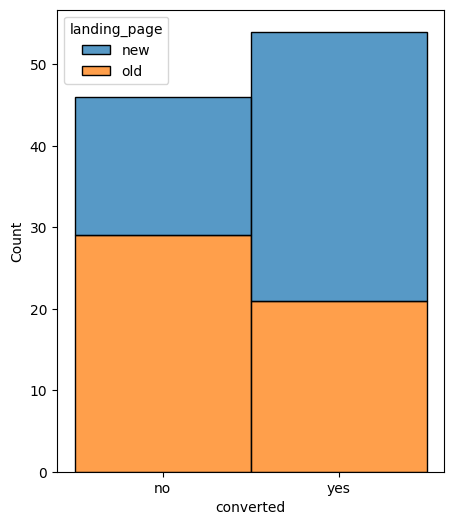

In [ ]:
#visuaizing relationship distribution of converted status with new and old landing page as the hue

plt.figure(figsize=(5,6))
sns.histplot( data,x="converted", hue="landing_page", stat="count",multiple="stack")
plt.show()

Observations:
- The number of converted users on the new landing_page is higher than that on the old landing page.
-The number of no converted users on the old landing_page is higher than that on the new landing page

## 3. Is the conversion and preferred language are independent or related?

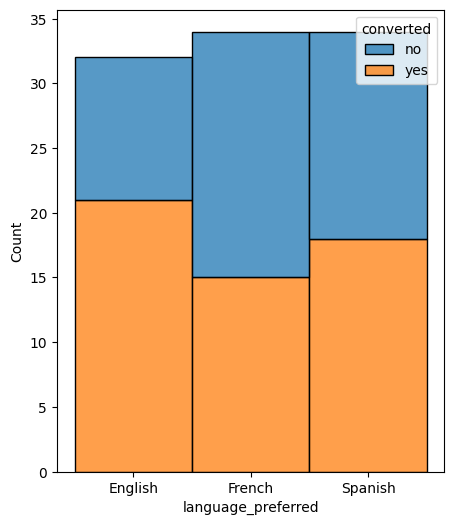

In [ ]:
#visualizing distribution dependency between converted status and preferred language

plt.figure(figsize=(5,6))
sns.histplot(data, x = 'language_preferred',hue ='converted',stat="count",multiple="stack",)
plt.show()

In [ ]:
#contingency table showing the distribution of two categorical variables - converted and language preferred

contin_table = pd.crosstab(data.converted, data.language_preferred)
contin_table.head()

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
#find p-value using chi2_contingency

from scipy.stats import chi2_contingency
chiVal, pVal, df, exp = chi2_contingency(contin_table)
print('The p-value is ',pVal)

The p-value is  0.21298887487543447


In [ ]:
# print conclusion based on p-value

if p_value < 0.05:
    print(f'As the p-value {pVal} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pVal} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is less than the level of significance, we reject the null hypothesis.


Since the p-value is > 0.05 , we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that converted and preferred language are not independent.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
#A new DataFrame for users who were shown the new landing page

df_1 = data[data['landing_page'] == 'new']
new_users = pd.DataFrame(df_1)
new_users.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [ ]:
# Combining the data and new_users DataFrames into new_dat

new_data = pd.merge(data,new_users)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 50 non-null     int64  
 1   group                   50 non-null     object 
 2   landing_page            50 non-null     object 
 3   time_spent_on_the_page  50 non-null     float64
 4   converted               50 non-null     object 
 5   language_preferred      50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ KB


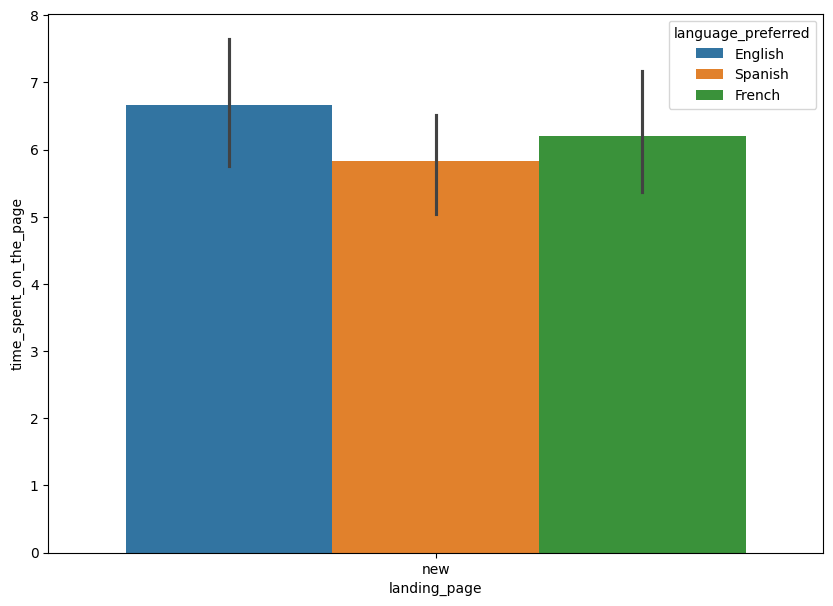

In [ ]:
#visualizing distribution of the time spent on the new page for different languages.

plt.figure(figsize=(10,7))
sns.barplot(data = new_data, y='time_spent_on_the_page',x='landing_page',hue='language_preferred')
plt.show()

In [ ]:
#Calculating the average time spent on the page based on language preference and landing page, then sorting the results in descending order using groupby() and sort_values().

avg_time = new_data.groupby(['language_preferred','landing_page'])['time_spent_on_the_page'].mean().sort_values(ascending=False).reset_index()
avg_time

<ipython-input-80-55a79bce8495>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time = new_data.groupby(['language_preferred','landing_page'])['time_spent_on_the_page'].mean().sort_values(ascending=False).reset_index()


,language_preferred,landing_page,time_spent_on_the_page
0,English,new,6.663750
1,French,new,6.196471
2,Spanish,new,5.835294
3,English,old,NaN
4,French,old,NaN
5,Spanish,old,NaN


Observations:
- The new landing page shows different mean times spent across the three preferred languages. English has the highest mean time spent, while Spanish has the lowest.

## Conclusion and Business Recommendations

When comparing the time spent on the new and old landing pages, users are spending more time on the new landing page, and statistically, there is enough evidence to support this.

- A visual analysis of the proportion of users who visit and convert on the new landing page shows a higher conversion rate compared to the old landing page, suggesting that the new landing page performs better. However, statistically, this does not hold.

- The conversion and preferred language users are independent, meaning there is no significant relationship between the two.

- In terms of the mean time spent on the new landing page by different language users, there is a noticeable difference, with English users spending the most time and Spanish users spending the least.
- This suggests that English users perform better on the new landing page. However, statistically, there isn't enough evidence to conclude that the mean time spent by users of different languages on the new landing page significantly differs.
- Finally, we observe that the mean time spent on the new landing page by users of different languages follows a normal distribution statistically.

___